In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('Sentiment-1.csv')

In [30]:
#df = pd.read_csv('D:/NLP_DataSets/Sentiment_Analysis/TwitterSA/test.csv')

In [3]:
df.head(1)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito


In [4]:
df.shape

(13871, 21)

In [5]:
df1 = df[['text', 'sentiment']]

In [6]:
df1.head(1)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral


In [7]:
df1.isnull().sum()

text         0
sentiment    0
dtype: int64

In [8]:
Sentiment = []
for e in df1['sentiment']:
    
    if e=='Positive' or e=='Neutral':
         Sentiment.append('positive')
    else:
         Sentiment.append('negative')
df1['sentiment'] = Sentiment

<ipython-input-8-9533ffea17a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sentiment'] = Sentiment


In [9]:
df1.head(1)

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,positive


C:\Users\bapan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


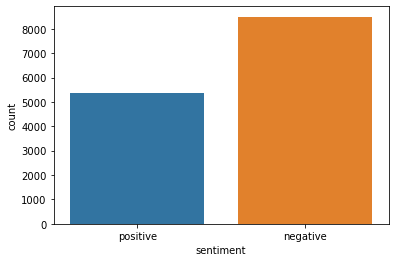

In [10]:
sns.countplot(df1.sentiment)
plt.show()

In [11]:
train_data = df1

In [12]:
Tweet = train_data.text

In [13]:
Tweet[0]

'RT @NancyLeeGrahn: How did everyone feel about the Climate Change question last night? Exactly. #GOPDebate'

In [14]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout, Masking, Bidirectional

In [15]:
from nltk.tokenize import RegexpTokenizer

In [16]:
data_list = list()
for comp in Tweet:
    data_list.append(RegexpTokenizer('\w+').tokenize(comp))

In [17]:
len(data_list)

13871

In [18]:
data_list[2]

['RT',
 'TJMShow',
 'No',
 'mention',
 'of',
 'Tamir',
 'Rice',
 'and',
 'the',
 'GOPDebate',
 'was',
 'held',
 'in',
 'Cleveland',
 'Wow']

In [19]:
low = []
for line in data_list:
    lines = list(map(lambda x: x.lower(), line))
    low.append(lines)

In [20]:
low[5]

['rt',
 'gregabbott_tx',
 'tedcruz',
 'on',
 'my',
 'first',
 'day',
 'i',
 'will',
 'rescind',
 'every',
 'illegal',
 'executive',
 'action',
 'taken',
 'by',
 'barack',
 'obama',
 'gopdebate',
 'foxnews']

In [21]:
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize

In [22]:
stop_words =  list(punctuation)  # + stopwords.words('english')  
# stop_words.remove('no')
# stop_words.remove('not')
# stop_words.remove("wasn't")
# stop_words.remove("shouldn't")
# stop_words.remove("isn't")
# stop_words.remove("haven't")
# stop_words.remove("down")
# stop_words.remove("off")
# stop_words.remove("aren't")
# stop_words.remove("couldn't")
# stop_words.remove("doesn't")
# stop_words.remove("only")
# stop_words.remove("most")
# stop_words.remove("over")
# stop_words.remove("under")
# stop_words.remove("such")
# stop_words.remove("too")
# stop_words.remove("few")
# stop_words.remove("against")
# stop_words.remove("if")

def tokenize(words):
    #words = word_tokenize(text)
    #words = [w.lower() for w in words]
    return [w for w in words if w not in stop_words]

In [23]:
stop_words

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [24]:
filtered_sentiment = []
for file_id in low:
    words = tokenize(file_id)
    filtered_sentiment.append(words)
    

In [25]:
filtered_sentiment[2]

['rt',
 'tjmshow',
 'no',
 'mention',
 'of',
 'tamir',
 'rice',
 'and',
 'the',
 'gopdebate',
 'was',
 'held',
 'in',
 'cleveland',
 'wow']

In [26]:
print(len(filtered_sentiment))
print(len(low))

13871
13871


In [27]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bapan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
lmtzr = WordNetLemmatizer()

In [29]:
lemmatized = []
for line in filtered_sentiment:
    lines = list(map(lambda x: lmtzr.lemmatize(x), line))
    lemmatized.append(lines)

In [30]:
lemmatized[2]

['rt',
 'tjmshow',
 'no',
 'mention',
 'of',
 'tamir',
 'rice',
 'and',
 'the',
 'gopdebate',
 'wa',
 'held',
 'in',
 'cleveland',
 'wow']

In [31]:
len(lemmatized)

13871

In [32]:
final_X = lemmatized

In [33]:
sent = []
for row in final_X:
    seq = ''
    for word in row:
        seq = seq + ' ' + word
    sent.append(seq)

In [34]:
final_X = pd.Series(sent)

In [35]:
print(final_X[1])

 rt scottwalker didn t catch the full gopdebate last night here are some of scott s best line in 90 second walker16 http t co zsff


In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [76]:
vocabsize = 5000
tokenizer = Tokenizer(num_words = vocabsize, split=' ')
tokenizer.fit_on_texts(final_X.values)
X = tokenizer.texts_to_sequences(final_X.values)
X = pad_sequences(X)

In [77]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [78]:
y = pd.get_dummies(train_data['sentiment']).values

In [79]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [0, 1]], dtype=uint8)

In [80]:
train_data['sentiment']

0        positive
1        positive
2        positive
3        positive
4        positive
           ...   
13866    negative
13867    positive
13868    positive
13869    negative
13870    positive
Name: sentiment, Length: 13871, dtype: object

In [81]:
X_train, X_val, y_train, y_val = train_test_split(
                                       X, y, test_size=0.15, random_state=111)

In [82]:
print(X_train.shape)
print(X_val.shape)

(11790, 31)
(2081, 31)


In [83]:
X_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          3, 3963,   47,   63,    2,  326,  179, 1161, 1840,  189, 1185,
         23, 1480, 1161,   90,   19,    8,    4,    9,    1])

In [84]:
embed_dim = 200
lstm_out = 196
model = Sequential()
model.add(Embedding(vocabsize, embed_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
#model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout = 0.2))
model.add(LSTM(lstm_out, dropout=0.4, recurrent_dropout = 0.2))
model.add(Dense(2, activation='softmax'))

In [85]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])

In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 31, 200)           1000000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 31, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               311248    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 1,311,642
Trainable params: 1,311,642
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=10)

Epoch 1/10
369/369 [==============================] - 31s 78ms/step - loss: 0.5761 - accuracy: 0.6908 - val_loss: 0.5150 - val_accuracy: 0.7492
Epoch 2/10
369/369 [==============================] - 27s 73ms/step - loss: 0.4782 - accuracy: 0.7709 - val_loss: 0.5139 - val_accuracy: 0.7371
Epoch 3/10
369/369 [==============================] - 28s 75ms/step - loss: 0.4226 - accuracy: 0.8036 - val_loss: 0.5123 - val_accuracy: 0.7395
Epoch 4/10
369/369 [==============================] - 27s 74ms/step - loss: 0.3763 - accuracy: 0.8295 - val_loss: 0.5454 - val_accuracy: 0.7463
Epoch 5/10
369/369 [==============================] - 27s 74ms/step - loss: 0.3381 - accuracy: 0.8502 - val_loss: 0.5759 - val_accuracy: 0.7386
Epoch 6/10
369/369 [==============================] - 27s 73ms/step - loss: 0.3038 - accuracy: 0.8613 - val_loss: 0.6226 - val_accuracy: 0.7299
Epoch 7/10
369/369 [==============================] - 27s 74ms/step - loss: 0.2813 - accuracy: 0.8757 - val_loss: 0.6807 - val_accuracy:

In [88]:
import numpy as np

In [89]:
twts = ['Only fanatical crowd is easily controllable']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=28, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  109 1124   12 1780]]
1/1 - 0s
positive


In [90]:
sentiment

array([0.10159443, 0.8984056 ], dtype=float32)

In [99]:
twts = ['''Modi talked about Swiss money but did nothing.
       Internally also he only harassed people with what chidambaram called demonization, 
       making the poor and middle class suffer for nothing.''']
       #['I use emotion for the many and reason for the few']]
#vectorizing the tweet by the pre-fitted tokenizer instance
twts = tokenizer.texts_to_sequences(twts)
#padding the tweet to have exactly the same shape as `embedding_2` input
twts = pad_sequences(twts, maxlen=28, dtype='int32', value=0)
print(twts)
sentiment = model.predict(twts,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")

[[  0   0   0   0   0   0   0 953  29 170  44  89 363 499  34 109  59  51
   47 496 420   2 563  13 791 540  20 363]]
1/1 - 0s
negative


In [101]:
sentiment 

array([0.9934582 , 0.00654184], dtype=float32)

In [55]:
pred_senti = []

for i in X_val:
    #print(i)
    Senti = model.predict(i.reshape(1,-1), batch_size = 1)[0]
    if np.argmax(Senti) == 0:
        pred_senti.append('negative')
    else:
        pred_senti.append('positive')
        

In [56]:
pred_senti[10:20]

['positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive']

In [57]:
y_val[10:20]

array([[0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1]], dtype=uint8)

In [58]:
!pip install afinn

  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53455 sha256=d94e8fc27c78736475f9e0b3f58ada181443d30effcb9b6e2b167383180a5d63
  Stored in directory: c:\users\bapan\appdata\local\pip\cache\wheels\f6\6f\c3\b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [58]:
from afinn import Afinn

In [59]:
af = Afinn()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train_af, X_val_af = train_test_split(
                                   final_X, test_size=0.15, random_state=111)

In [62]:
X_train_af.shape, X_val_af.shape

((11790,), (2081,))

In [63]:
X_train_af[10]

' jgreendc realdonaldtrump in all fairness billclinton owns that phrase gopdebate'

In [64]:
X_val_af[0]

' rt nancyleegrahn how did everyone feel about the climate change question last night exactly gopdebate'

In [65]:
sentiment_scores = [af.score(tweet) for tweet in X_val_af]

In [67]:
#sentiment_scores

In [68]:
an = ['positive' if score > 0 else 'negative' for score in sentiment_scores]

In [69]:
actual = []
for i in range(len(y_val)):
    if y_val[i][1] == 1:
        actual.append('positive')
    else:
        actual.append('negative')

In [70]:
test_df = pd.DataFrame()
test_df['Actual Sentiment'] = actual
test_df['LSTM_Sentiment'] = pred_senti
test_df['Auto_Sentiment'] = an

In [71]:
test_df.head(10)

,Actual Sentiment,LSTM_Sentiment,Auto_Sentiment
0,negative,negative,negative
1,negative,positive,positive
2,positive,positive,positive
3,negative,positive,negative
4,positive,negative,negative
5,positive,positive,negative
6,negative,negative,positive
7,negative,positive,negative
8,positive,positive,negative
9,negative,negative,positive


In [72]:
confusion_df1 = pd.crosstab(test_df['Actual Sentiment'], test_df['LSTM_Sentiment'], rownames=['Actual'], colnames=['predicted'], margins=True)

In [73]:
confusion_df1

predicted,negative,positive,All
Actual,,,
negative,1010,284,1294
positive,308,479,787
All,1318,763,2081


In [74]:
confusion_df2 = pd.crosstab(test_df['Actual Sentiment'], test_df['Auto_Sentiment'], rownames=['Actual'], colnames=['predicted'], margins=True)

In [75]:
confusion_df2

predicted,negative,positive,All
Actual,,,
negative,876,418,1294
positive,418,369,787
All,1294,787,2081
